<a href="https://colab.research.google.com/github/MaxKuzaj13/dw_matrix_NLP/blob/master/matrix_4_day_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/four'

/content/drive/My Drive/Colab Notebooks/matrix/four


In [3]:
import gzip
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import Word2Vec, LdaMulticore
import pandas as pd
import numpy as np
from gensim.corpora import Dictionary
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pyLDAvis
from pyLDAvis import gensim
import gensim

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#!pip install pyLDAvis
#!pip install --upgrade gensim

In [6]:
#Should be 3.8.0 or newer
gensim.__version__

'3.8.1'

In [12]:
pyLDAvis.__version__

'2.1.2'

In [8]:
#ls data
ls -lh data

total 230M
-rw------- 1 root root 230M Apr 10 12:23 reviews_data.txt


In [11]:
# IF ziped
# with gzip.open('data/reviews_data.txt.gz', 'rb') as f:
#   for i, line in enumerate(f):
#     print(i, line)
#     break
with open('data/reviews_data.txt', 'rb') as f:
  for i, line in enumerate(f):
    print(i, line)
    break


0 b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in 

Data

In [0]:
# read all data
def read_sentences(filename):
  with open(filename, 'rb') as f:
    for line in f:
      yield line

In [0]:
sentences =read_sentences('data/reviews_data.txt')

In [16]:
next(sentences)

b"Aug 4 2009 \tExcellent value - location not a big problem.\tWe stayed at the Aloft Beijing Haidian for 5 nights from July 17 - 22nd. There are lots of reviews that talk about the location being a problem but we knew this ahead of time and found that it really wasn't an issue. The longest we spent in a taxi was about 30 minutes. We never paid more than 50rmb for a taxi ride (which is about $8 Cdn) and that was to the Forbidden City. Given there are 4 in our family, it was no big deal at all.As for the rooms, they were clean, the beds comfortable, the wireless internet connection reliable and it was one of the few hotels we found in Beijing that would accomodate 2 adults and 2 children. We paid about $70 Cdn. per night. That's an amazing price.It's not meant to be a 5 star hotel so you can't go in expecting that. We found the reception staff generally very helpful and friendly. They aren't the fastest in the world but it wasn't unreasonable at all.The hotel manager made an effort to sp

In [17]:
simple_preprocess(' \tExcellent value - location not a big problem.\t')

['excellent', 'value', 'location', 'not', 'big', 'problem']

In [18]:
STOPWORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [20]:
#how it work
sentences = ' \tExcellent value - location not a too big problem.\t'
[word for word in simple_preprocess(sentences) if word not in STOPWORDS]

['excellent', 'value', 'location', 'big', 'problem']

In [0]:
def proceesing(sentences):
  return[word for word in simple_preprocess(sentences) if word not in STOPWORDS]

def read_sentences(filename):
  with open(filename, 'rb') as f:
    for line in f:
      yield proceesing(line)

In [22]:
%time
sentences =list(read_sentences('data/reviews_data.txt'))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [23]:
len(sentences)

255404

Model

In [24]:
%time
#model = Word2Vec(sentences, size = 100, window=5, min_count=2)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [26]:
!pwd

/content/drive/My Drive/Colab Notebooks/matrix/four


Vector *Model* representation

In [0]:
model = Word2Vec.load('models/hotel_model_size100_window10_mincount2.model')

In [28]:
model.wv['good']

array([ 0.97603637,  0.02845238,  0.9340434 , -0.01046226, -0.3526209 ,
        0.37585095,  0.56109273, -2.8927894 , -0.7017411 ,  0.644323  ,
        2.4389777 , -2.5760446 ,  2.386308  , -0.914983  , -0.8236628 ,
        0.92424065,  1.0764656 , -1.3493117 ,  0.7083169 , -0.7678454 ,
        1.1521931 ,  0.804223  , -2.7024324 , -4.0478754 ,  5.1723785 ,
       -1.1332165 , -3.5414255 ,  2.71149   ,  3.1763256 , -2.2191353 ,
       -3.4369047 ,  0.57519054,  0.5042111 , -0.20707497,  0.9445265 ,
       -1.8328143 ,  3.0770082 , -2.2103646 , -1.0803887 ,  2.3835974 ,
       -0.31298274,  3.1534405 ,  2.4561608 ,  1.7069513 ,  0.82824373,
       -2.000538  , -0.7381386 ,  1.7338051 , -0.8375685 ,  1.5798111 ,
       -0.4054633 , -2.2848763 ,  0.745197  ,  3.7897346 ,  2.1228933 ,
        0.14654094,  4.009864  , -3.9656124 ,  2.2942836 ,  0.9487566 ,
       -0.27329406,  1.851443  , -1.4374853 ,  1.2032014 ,  1.6215566 ,
        0.39961776, -1.432135  ,  3.6794324 ,  0.15426649,  1.22

In [29]:
model.wv.most_similar('bad')

[('terrible', 0.7091025114059448),
 ('horrible', 0.6725283861160278),
 ('awful', 0.6613410115242004),
 ('okay', 0.6073172092437744),
 ('sucked', 0.6060259342193604),
 ('poor', 0.6045093536376953),
 ('crappy', 0.6011784076690674),
 ('ok', 0.5935438871383667),
 ('complain', 0.5927609205245972),
 ('worse', 0.5925099849700928)]

In [30]:
model.wv.most_similar('good')

[('decent', 0.7995322346687317),
 ('great', 0.7496005892753601),
 ('excellent', 0.7420488595962524),
 ('fair', 0.625230073928833),
 ('ok', 0.6243417859077454),
 ('average', 0.5921893119812012),
 ('reasonable', 0.5821887850761414),
 ('nice', 0.5542484521865845),
 ('wise', 0.5451887845993042),
 ('fine', 0.5380234718322754)]

In [31]:
model.wv.most_similar(positive=['bad', 'terrible'], negative=['good'])

[('horrible', 0.8423725962638855),
 ('awful', 0.8038561940193176),
 ('horrific', 0.7360600233078003),
 ('horrid', 0.7299700379371643),
 ('dreadful', 0.7213677167892456),
 ('shocking', 0.6904001235961914),
 ('nasty', 0.6877930760383606),
 ('disaster', 0.6822035908699036),
 ('appalling', 0.6815707683563232),
 ('horrendous', 0.6786438822746277)]

In [36]:
model.wv.most_similar('london')

[('manhattan', 0.7099957466125488),
 ('nyc', 0.7088299989700317),
 ('ny', 0.6983960866928101),
 ('manhatten', 0.6517903804779053),
 ('dubai', 0.6427273154258728),
 ('sf', 0.6353819966316223),
 ('city', 0.625447154045105),
 ('beijing', 0.5914015769958496),
 ('chicago', 0.5883169770240784),
 ('montreal', 0.5735098123550415)]

In [37]:
model.wv.most_similar('bmw')

[('audi', 0.8781298398971558),
 ('mercedes', 0.8367721438407898),
 ('maybach', 0.8282862901687622),
 ('limousine', 0.8218904733657837),
 ('chauffeur', 0.8141704797744751),
 ('chauffer', 0.7926292419433594),
 ('customs', 0.7920506596565247),
 ('merc', 0.7773985862731934),
 ('driven', 0.7625347971916199),
 ('limo', 0.7616715431213379)]

Topic modeling LDA

In [0]:
# choose some sample. Which is randomly changed inside them self

In [0]:
sentences_light = np.random.permutation(sentences)

In [0]:
sentences_light = sentences_light[:1000]

In [41]:
%time
dictionary = Dictionary(sentences_light)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [42]:
list(dictionary.items())

[(0, 'absolutely'),
 (1, 'accommodated'),
 (2, 'attentive'),
 (3, 'block'),
 (4, 'central'),
 (5, 'check'),
 (6, 'clean'),
 (7, 'distance'),
 (8, 'downtown'),
 (9, 'entrance'),
 (10, 'farther'),
 (11, 'friendly'),
 (12, 'jul'),
 (13, 'larger'),
 (14, 'lots'),
 (15, 'loved'),
 (16, 'manhattan'),
 (17, 'mid'),
 (18, 'need'),
 (19, 'new'),
 (20, 'penn'),
 (21, 'perfectly'),
 (22, 'rate'),
 (23, 'room'),
 (24, 'slightly'),
 (25, 'staff'),
 (26, 'station'),
 (27, 'stay'),
 (28, 'subway'),
 (29, 'things'),
 (30, 'totally'),
 (31, 'town'),
 (32, 'upgraded'),
 (33, 'uptown'),
 (34, 'walking'),
 (35, 'worth'),
 (36, 'yorker'),
 (37, 'anniversary'),
 (38, 'annoying'),
 (39, 'arrival'),
 (40, 'avoid'),
 (41, 'based'),
 (42, 'bathroom'),
 (43, 'beds'),
 (44, 'berry'),
 (45, 'breakfast'),
 (46, 'building'),
 (47, 'champagne'),
 (48, 'chelsea'),
 (49, 'chocolates'),
 (50, 'choose'),
 (51, 'city'),
 (52, 'cocktails'),
 (53, 'colorful'),
 (54, 'comfort'),
 (55, 'comfortable'),
 (56, 'cream'),
 (57, 'c

In [43]:
%time
#BAG OF WORDS
bow_corpus = [dictionary.doc2bow(sent) for sent in sentences_light]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


In [44]:
dictionary.doc2bow(['car', 'car', 'hotel'])

[(79, 1), (205, 2)]

In [45]:
dictionary.token2id['hotel']

79

In [46]:
%time
lda_model = LdaMulticore(bow_corpus, id2word=dictionary, num_topics=100, passes = 20, workers=8)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [48]:
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {}\nWords:{}'.format(idx, topic))

Topic: 0
Words:0.048*"great" + 0.023*"hotel" + 0.022*"room" + 0.015*"staff" + 0.012*"sep" + 0.011*"stay" + 0.011*"clean" + 0.009*"quot" + 0.009*"garden" + 0.008*"value"
Topic: 1
Words:0.023*"room" + 0.012*"water" + 0.012*"apr" + 0.012*"bathroom" + 0.012*"staff" + 0.012*"location" + 0.012*"designed" + 0.012*"badly" + 0.012*"unfriendly" + 0.012*"arrange"
Topic: 2
Words:0.036*"room" + 0.032*"hotel" + 0.016*"great" + 0.015*"good" + 0.015*"location" + 0.010*"stay" + 0.010*"walk" + 0.008*"excellent" + 0.008*"day" + 0.007*"staff"
Topic: 3
Words:0.035*"hotel" + 0.020*"room" + 0.015*"good" + 0.012*"stay" + 0.011*"breakfast" + 0.009*"location" + 0.009*"great" + 0.008*"noisy" + 0.008*"got" + 0.008*"ready"
Topic: 4
Words:0.014*"place" + 0.011*"old" + 0.011*"room" + 0.011*"folks" + 0.011*"casino" + 0.009*"hotel" + 0.009*"times" + 0.009*"door" + 0.009*"think" + 0.009*"night"
Topic: 5
Words:0.024*"hotel" + 0.014*"good" + 0.012*"room" + 0.012*"breakfast" + 0.011*"amp" + 0.008*"location" + 0.008*"quot"

Visualization

In [50]:
lda_vis =pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(lda_vis)

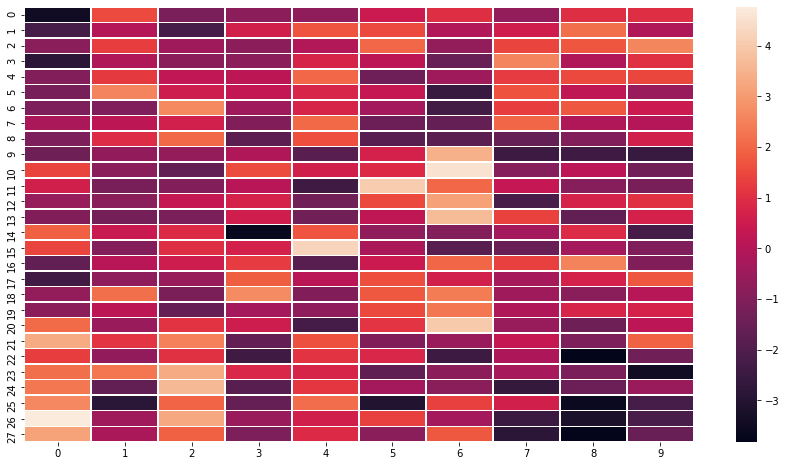

In [0]:
plt.figure(figsize=(15,8))
sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5)

In [0]:
def plot_heatmap(model):
  plt.figure(figsize=(15,8))
  sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5)
  

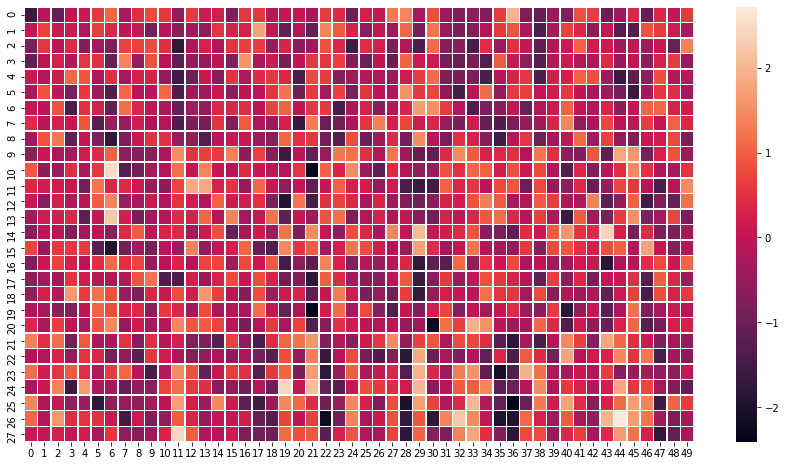

In [0]:
plot_heatmap(Word2Vec(sentences, size = 50, window=4))

PCA

In [0]:
def plot_pca(model):
  X = model.wv[model.wv.vocab]
  pca_model = PCA(n_components=2)
  result = pca_model.fit_transform(X)

  plt.figure(figsize=(15,8))
  plt.scatter(result[:,0], result[:,1])
  words = list(model.wv.vocab)
  for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

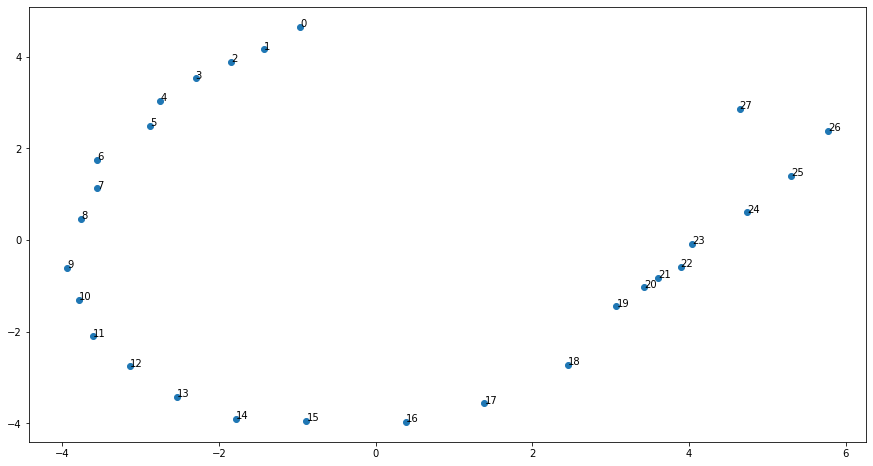

In [0]:
plot_pca(Word2Vec(sentences, size =300, window =10 ))

# Most similar

In [0]:
model = Word2Vec(sentences, size =300, window=5)

In [0]:
model.wv.most_similar('10', topn=3)

[('8', 0.40089863538742065),
 ('11', 0.3632128834724426),
 ('13', 0.32758235931396484)]

In [0]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('12', 0.3333471715450287),
 ('11', 0.3150789141654968),
 ('13', 0.2891678810119629)]